# CO<sub>2</sub> Emission Prediction

Get your data from https://www.electricitymaps.com/data-portal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## General

In [2]:
df = pd.read_csv('DE_hourly.csv', parse_dates=['Datetime (UTC)'])
df["year"] = df['Datetime (UTC)'].dt.year
df["month"] = df['Datetime (UTC)'].dt.month
df['year_month'] = df['Datetime (UTC)'].dt.to_period('M')
df['weekday'] = df['Datetime (UTC)'].dt.day_name()
df["day"] = df['Datetime (UTC)'].dt.day
df["calendar_day"] = df['Datetime (UTC)'].dt.to_period('D')
df['hour'] = df['Datetime (UTC)'].dt.hour
df

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method,year,month,year_month,weekday,day,calendar_day,hour
0,2021-01-01 00:00:00,Germany,Germany,DE,455.06,533.41,49.34,28.95,entsoe.eu,False,NaN,2021,1,2021-01,Friday,1,2021-01-01,0
1,2021-01-01 01:00:00,Germany,Germany,DE,461.21,540.23,48.92,28.29,entsoe.eu,False,NaN,2021,1,2021-01,Friday,1,2021-01-01,1
2,2021-01-01 02:00:00,Germany,Germany,DE,471.32,550.80,48.00,27.05,entsoe.eu,False,NaN,2021,1,2021-01,Friday,1,2021-01-01,2
3,2021-01-01 03:00:00,Germany,Germany,DE,471.82,551.23,48.03,26.38,entsoe.eu,False,NaN,2021,1,2021-01,Friday,1,2021-01-01,3
4,2021-01-01 04:00:00,Germany,Germany,DE,482.10,562.54,46.98,25.85,entsoe.eu,False,NaN,2021,1,2021-01,Friday,1,2021-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,Germany,Germany,DE,138.95,186.76,84.33,80.71,entsoe.eu,False,NaN,2023,12,2023-12,Sunday,31,2023-12-31,19
26276,2023-12-31 20:00:00,Germany,Germany,DE,137.63,186.06,84.13,80.63,entsoe.eu,False,NaN,2023,12,2023-12,Sunday,31,2023-12-31,20
26277,2023-12-31 21:00:00,Germany,Germany,DE,139.16,188.34,83.94,81.59,entsoe.eu,False,NaN,2023,12,2023-12,Sunday,31,2023-12-31,21
26278,2023-12-31 22:00:00,Germany,Germany,DE,139.13,188.80,83.83,81.97,entsoe.eu,False,NaN,2023,12,2023-12,Sunday,31,2023-12-31,22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Datetime (UTC)                        26280 non-null  datetime64[ns]
 1   Country                               26280 non-null  object        
 2   Zone Name                             26280 non-null  object        
 3   Zone Id                               26280 non-null  object        
 4   Carbon Intensity gCO₂eq/kWh (direct)  26280 non-null  float64       
 5   Carbon Intensity gCO₂eq/kWh (LCA)     26280 non-null  float64       
 6   Low Carbon Percentage                 26280 non-null  float64       
 7   Renewable Percentage                  26280 non-null  float64       
 8   Data Source                           26280 non-null  object        
 9   Data Estimated                        26280 non-null  bool          
 10

In [4]:
df.describe()

,Datetime (UTC),Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,year,month,day,hour
count,26280,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,2022-07-02 11:30:00,370.144297,436.513349,59.722540,50.923965,2022.000000,6.526027,15.720548,11.500000
min,2021-01-01 00:00:00,87.400000,131.140000,23.160000,18.280000,2021.000000,1.000000,1.000000,0.000000
25%,2021-10-01 17:45:00,269.460000,328.477500,49.050000,38.020000,2021.000000,4.000000,8.000000,5.750000
50%,2022-07-02 11:30:00,376.635000,443.160000,59.440000,49.970000,2022.000000,7.000000,16.000000,11.500000
75%,2023-04-02 05:15:00,471.000000,544.352500,70.590000,63.210000,2023.000000,10.000000,23.000000,17.250000
max,2023-12-31 23:00:00,684.420000,778.890000,89.900000,89.450000,2023.000000,12.000000,31.000000,23.000000
std,NaN,128.700356,138.295294,13.958533,15.843180,0.816512,3.447917,8.796414,6.922318


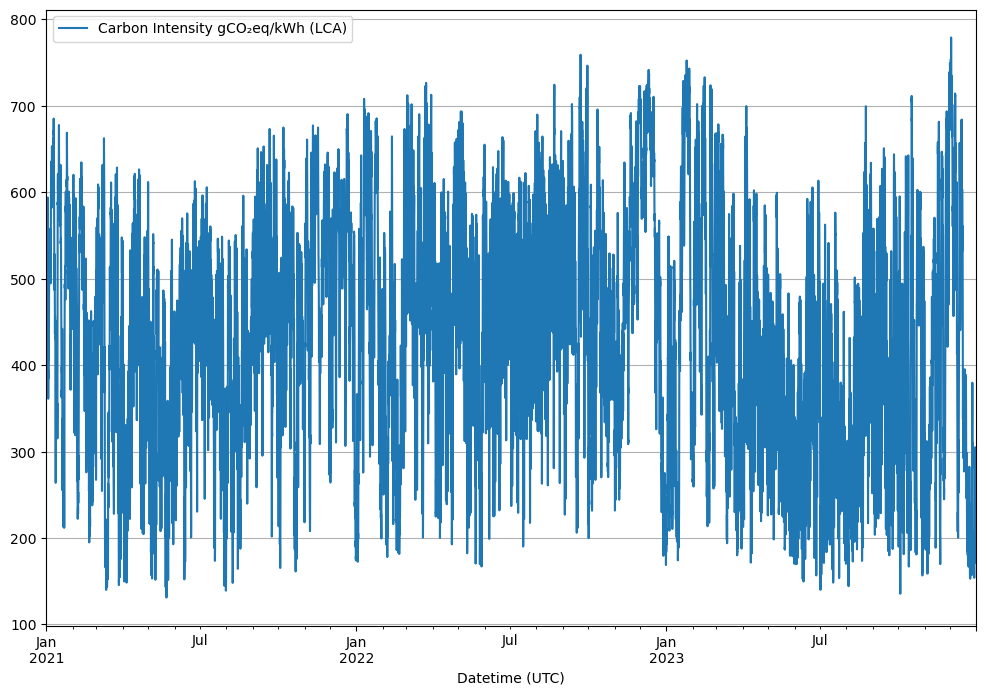

In [5]:
df.plot(y="Carbon Intensity gCO₂eq/kWh (LCA)", x="Datetime (UTC)", figsize=(12, 8))
plt.grid(True, axis="y")
plt.show()

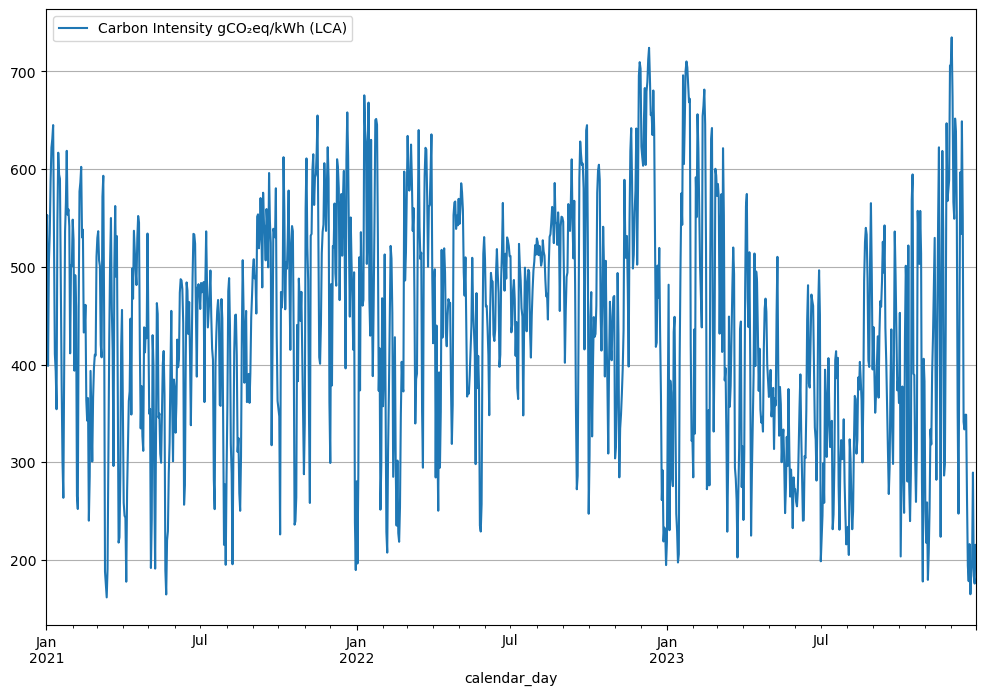

In [6]:
df[["calendar_day", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby("calendar_day").mean().plot(figsize=(12, 8))
plt.grid(True, axis="y")
plt.show()

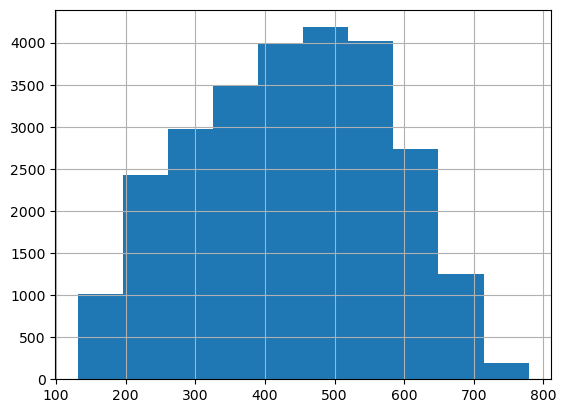

In [7]:
df["Carbon Intensity gCO₂eq/kWh (LCA)"].hist()
plt.show()

## By Year

In [8]:
df[["Carbon Intensity gCO₂eq/kWh (LCA)", "year"]].groupby("year").describe()

Carbon Intensity gCO₂eq/kWh (LCA)                                  \
                                 count        mean         std     min   
year                                                                     
2021                            8760.0  438.227508  125.170841  131.14   
2022                            8760.0  476.223946  130.470482  167.03   
2023                            8760.0  395.088592  146.268892  135.48   

                                           
           25%      50%       75%     max  
year                                       
2021  349.0975  451.715  537.0100  690.33  
2022  384.2225  487.120  576.7675  758.98  
2023  275.8975  374.915  502.3400  778.89

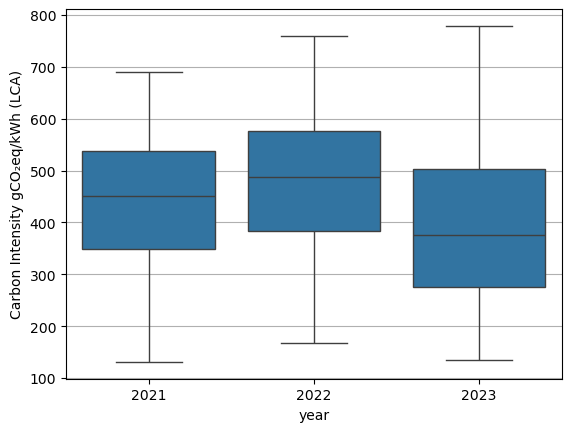

In [9]:
sns.boxplot(x="year", y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df)
plt.grid(True, axis="y")
plt.show()

## By Month

In [10]:
df[["month", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby("month").describe()

Carbon Intensity gCO₂eq/kWh (LCA)                                  \
                                  count        mean         std     min   
month                                                                     
1                                2232.0  477.992361  148.504203  172.51   
2                                2016.0  429.779742  139.281486  177.99   
3                                2232.0  451.039803  144.762451  139.98   
4                                2160.0  418.107778  120.521589  148.35   
5                                2232.0  368.205789  119.185429  131.14   
6                                2160.0  422.293565  114.861537  149.64   
7                                2232.0  394.213217  119.930678  139.11   
8                                2232.0  426.039082  128.454116  144.26   
9                                2160.0  478.877486  121.187538  179.99   
10                               2232.0  422.137097  123.283699  135.48   
11                               2160.0  477.164394  140.686719  158.76   
12                               2232.0  473.283714  174.096546  152.96   

                                            
            25%      50%       75%     max  
month                                       
1      365.6100  497.380  601.5300  752.29  
2      311.8575  416.650  543.0425  732.87  
3      335.6050  468.480  570.0725  726.41  
4      325.2325  425.615  508.8300  699.58  
5      275.9325  364.680  450.6625  693.43  
6      342.5075  432.520  514.4875  663.69  
7      303.0050  395.365  494.3250  670.63  
8      328.9675  426.660  530.1625  724.26  
9      400.0125  494.145  572.8475  758.98  
10     327.5700  438.060  517.8350  711.30  
11     365.6900  504.470  593.7150  749.52  
12     319.4800  516.250  616.4600  778.89

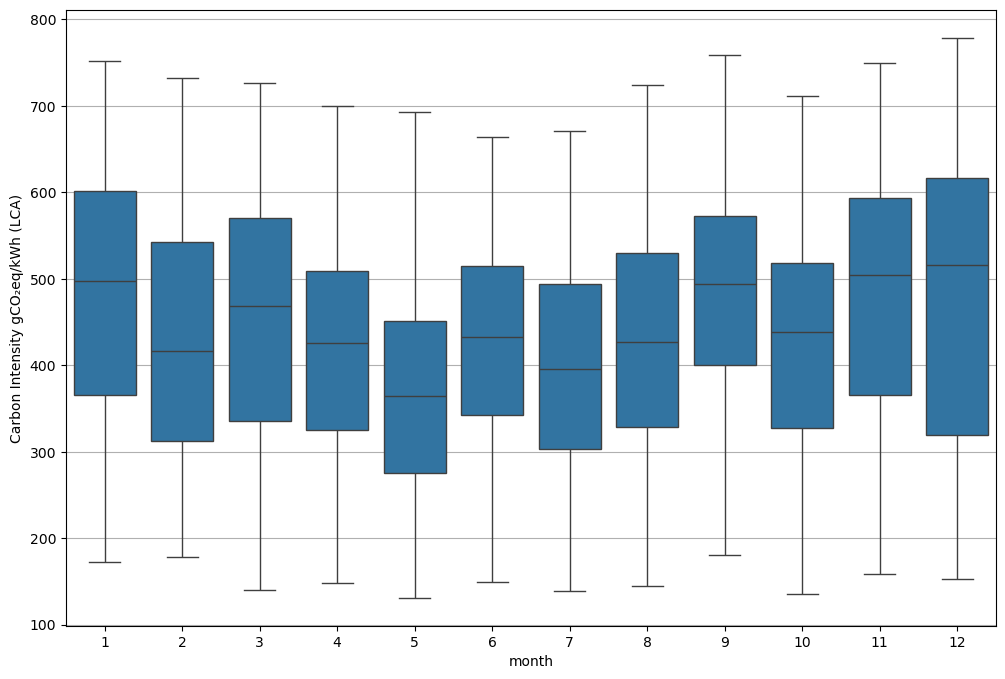

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="month", y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df)
plt.grid(True, axis="y")
plt.show()

## By Year and Month

In [12]:
df[["year_month", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby("year_month").describe()

Carbon Intensity gCO₂eq/kWh (LCA)                                  \
                                       count        mean         std     min   
year_month                                                                     
2021-01                                744.0  505.062702  108.274181  211.83   
2021-02                                672.0  420.466339  113.297696  194.92   
2021-03                                744.0  411.363468  146.007102  139.98   
2021-04                                720.0  401.411069  123.246902  148.35   
2021-05                                744.0  331.108374  105.266885  131.14   
2021-06                                720.0  432.521056   96.357703  152.11   
2021-07                                744.0  411.856586  105.993586  139.11   
2021-08                                744.0  381.113414   97.977614  148.05   
2021-09                                720.0  510.508153   90.709603  201.65   
2021-10                                744.0  435.068965  116.555040  161.31   
2021-11                                720.0  522.489278  109.092418  207.94   
2021-12                                744.0  497.719919  116.742781  174.07   
2022-01                                744.0  480.883696  142.234844  172.51   
2022-02                                672.0  370.731012  121.039063  177.99   
2022-03                                744.0  533.174570  119.059091  200.43   
2022-04                                720.0  442.750153  118.394131  192.60   
2022-05                                744.0  438.500954  128.382545  167.03   
2022-06                                720.0  475.236389  102.039394  198.96   
2022-07                                744.0  461.303602  103.553409  190.16   
2022-08                                744.0  521.861694   95.887708  260.88   
2022-09                                720.0  516.441389  121.058755  206.08   
2022-10                                744.0  445.322634  102.627918  199.83   
2022-11                                720.0  492.215431  123.766952  231.68   
2022-12                                744.0  526.758374  173.135083  168.72   
2023-01                                744.0  448.030685  180.623195  174.14   
2023-02                                672.0  498.141875  150.032771  213.60   
2023-03                                744.0  408.581371  131.510821  179.98   
2023-04                                720.0  410.162111  116.014289  171.54   
2023-05                                744.0  335.008038   87.526203  170.25   
2023-06                                720.0  359.123250  114.069035  149.64   
2023-07                                744.0  309.479462   96.033914  140.04   
2023-08                                744.0  375.142137  130.162904  144.26   
2023-09                                720.0  409.682917  118.352055  179.99   
2023-10                                744.0  386.019691  139.670980  135.48   
2023-11                                720.0  416.788472  162.109617  158.76   
2023-12                                744.0  395.372849  194.592350  152.96   

                                                 
                 25%      50%       75%     max  
year_month                                       
2021-01     431.2075  532.800  588.3050  685.09  
2021-02     332.6275  420.325  514.3925  634.49  
2021-03     286.7200  451.930  533.6125  662.45  
2021-04     310.1300  407.165  501.4125  626.37  
2021-05     236.5025  338.440  414.8075  579.06  
2021-06     379.4550  444.920  508.1375  612.69  
2021-07     350.2825  428.530  496.5500  605.63  
2021-08     315.7975  387.265  451.3925  595.97  
2021-09     454.1200  533.405  579.0625  673.14  
2021-10     356.6525  455.005  521.5875  674.77  
2021-11     456.2900  546.900  611.0950  677.18  
2021-12     444.3500  528.065  576.2550  690.33  
2022-01     384.9300  486.655  609.5300  707.90  
2022-02     271.8350  355.140  465.5300  673.10  
2022-03     454.8150  556.755  631.3725 

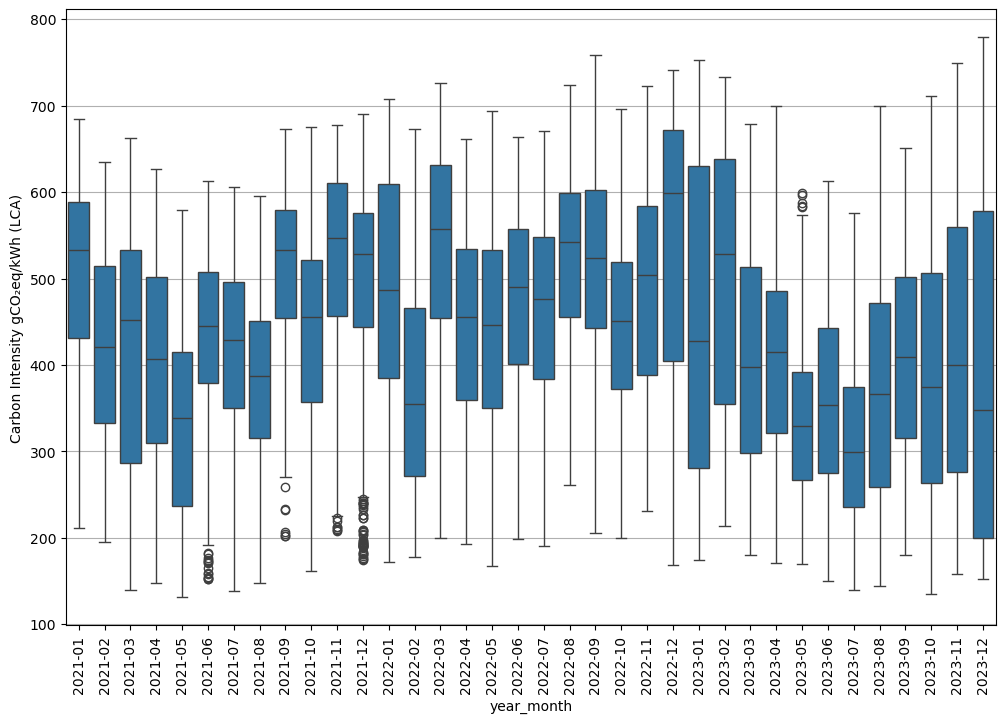

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="year_month", y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.grid(True, axis="y")
plt.show()

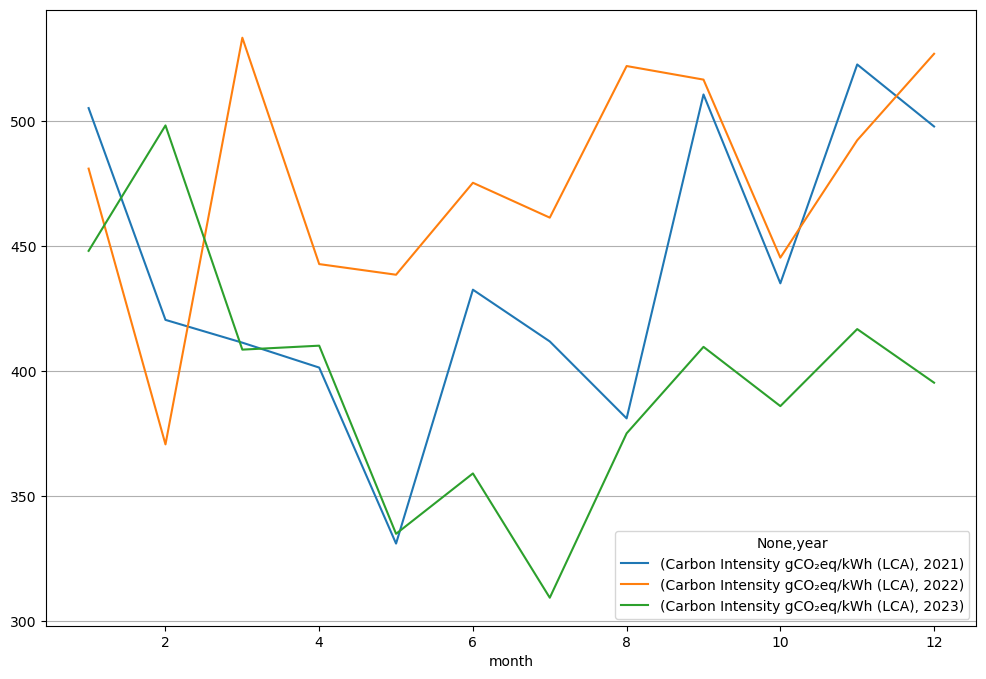

In [14]:
df[["year", "month", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby(["month", "year"]).mean().unstack().plot(figsize=(12,8))
plt.grid(True, axis="y")
plt.show()

## By Weekday

In [15]:
df[["weekday", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby("weekday").describe()

Carbon Intensity gCO₂eq/kWh (LCA)                                  \
                                      count        mean         std     min   
weekday                                                                       
Friday                               3768.0  436.979546  129.133380  139.98   
Monday                               3744.0  445.403288  133.832616  148.35   
Saturday                             3768.0  404.986523  146.542229  131.14   
Sunday                               3768.0  394.213970  146.872385  148.05   
Thursday                             3744.0  449.813921  133.168714  144.26   
Tuesday                              3744.0  466.185486  129.726712  135.48   
Wednesday                            3744.0  458.480964  131.444767  153.18   

                                                
                25%      50%       75%     max  
weekday                                         
Friday     344.9025  438.795  531.5900  753.78  
Monday     340.8025  454.920  547.2900  735.20  
Saturday   282.1500  401.610  525.8500  778.89  
Sunday     263.4000  388.045  514.4725  741.48  
Thursday   353.3050  452.885  554.0700  758.98  
Tuesday    370.3825  474.585  565.2525  752.29  
Wednesday  350.1925  467.355  563.5775  756.53

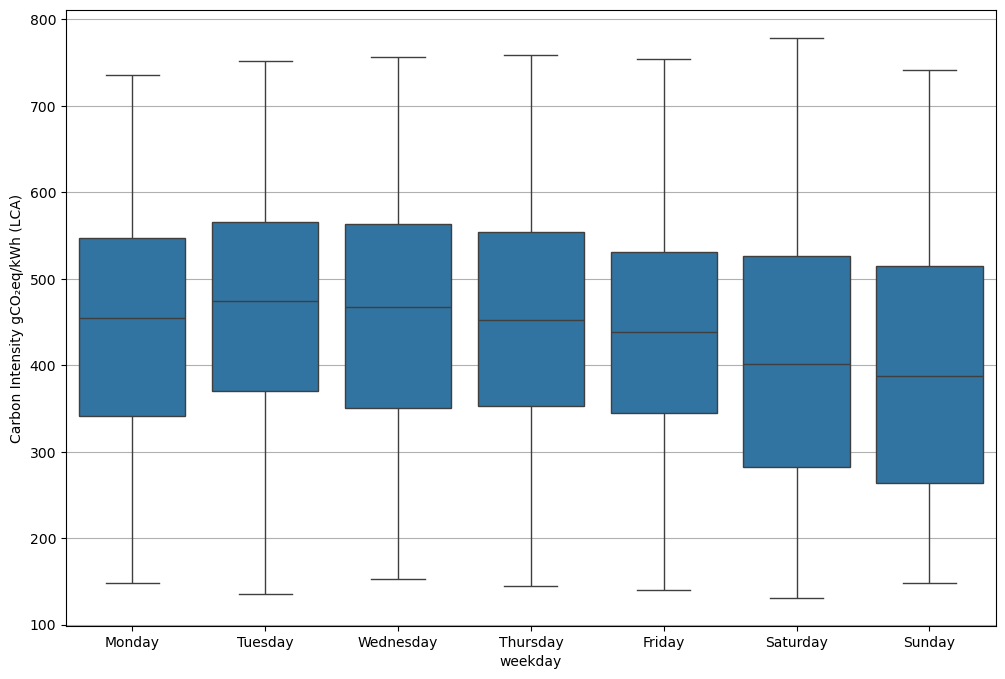

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='weekday', y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True, axis="y")
plt.show()

## By Day

In [17]:
df[["day", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby("day").describe()

Carbon Intensity gCO₂eq/kWh (LCA)                                  \
                                count        mean         std     min   
day                                                                     
1                               864.0  408.403391  148.518233  140.04   
2                               864.0  424.049954  150.182487  149.72   
3                               864.0  418.476458  141.077444  135.48   
4                               864.0  432.867384  136.351249  157.07   
5                               864.0  429.436424  131.631205  148.35   
6                               864.0  430.757766  144.766401  177.99   
7                               864.0  423.474838  138.812490  181.28   
8                               864.0  451.548519  132.539920  148.05   
9                               864.0  454.912975  131.351118  151.71   
10                              864.0  458.471620  132.455424  152.74   
11                              864.0  454.168900  136.223157  149.64   
12                              864.0  456.152650  136.979129  139.98   
13                              864.0  433.209132  144.317797  143.44   
14                              864.0  454.413160  144.025297  152.43   
15                              864.0  458.932766  130.424042  163.68   
16                              864.0  450.668333  125.191644  148.38   
17                              864.0  437.299468  130.487004  186.05   
18                              864.0  435.220741  117.188219  173.54   
19                              864.0  414.072836  109.515122  169.81   
20                              864.0  417.737616  138.270173  179.99   
21                              864.0  431.051597  146.656377  143.24   
22                              864.0  445.183345  140.519896  131.14   
23                              864.0  445.476343  143.861747  153.66   
24                              864.0  429.266956  142.025040  151.49   
25                              864.0  445.518079  140.425571  166.40   
26                              864.0  448.589433  138.022712  156.71   
27                              864.0  443.929676  126.736172  145.54   
28                              864.0  449.018796  139.633104  154.58   
29                              792.0  426.395909  147.749282  144.81   
30                              792.0  422.556199  148.613452  171.00   
31                              504.0  371.598472  135.014112  139.11   

                                          
          25%      50%       75%     max  
day                                       
1    281.2750  407.660  526.7800  753.78  
2    292.4450  421.010  545.7675  778.89  
3    311.8650  415.845  529.7300  706.02  
4    331.3000  462.070  535.5050  693.43  
5    344.9250  448.510  521.1050  699.58  
6    307.9300  413.510  556.0725  716.70  
7    302.9150  417.855  530.3275  711.94  
8    344.3750  462.550  557.6100  723.50  
9    363.5750  458.835  566.8250  719.52  
10   372.0975  472.070  562.1700  729.08  
11   359.6900  459.480  553.4375  741.48  
12   356.8550  474.890  556.8975  709.04  
13   317.9700  455.770  547.5125  722.98  
14   351.5725  474.035  573.9875  721.43  
15   364.2650  473.985  555.9475  732.87  
16   357.2825  454.070  540.2800  711.30  
17   325.6325  450.175  553.6775  693.84  
18   341.3975  442.970  536.0500  670.79  
19   335.3625  412.355  489.5500  689.22  
20   302.0300  420.030  519.5025  728.62  
21   305.8375  444.635  542.6300  756.53  
22   352.9025  455.910  550.4250  758.98  
23   330.4725  448.830  562.8750  735.20  
24   321.6325  416.275  543.6000  752.29  
25   336.0875  448.625  561.4375  735.12  
26   336.1100  461.215  561.8700  730.10  
27   350.2375  450.505  539.4100  743.00  
28   351.4950  454.775  553.1675  730.40  
29   312.5775  433.590  539.8400  743.56  
30   303.9125  423.265  528.0800  749.52  
31   246.7075  371.455  479.9300  670.63

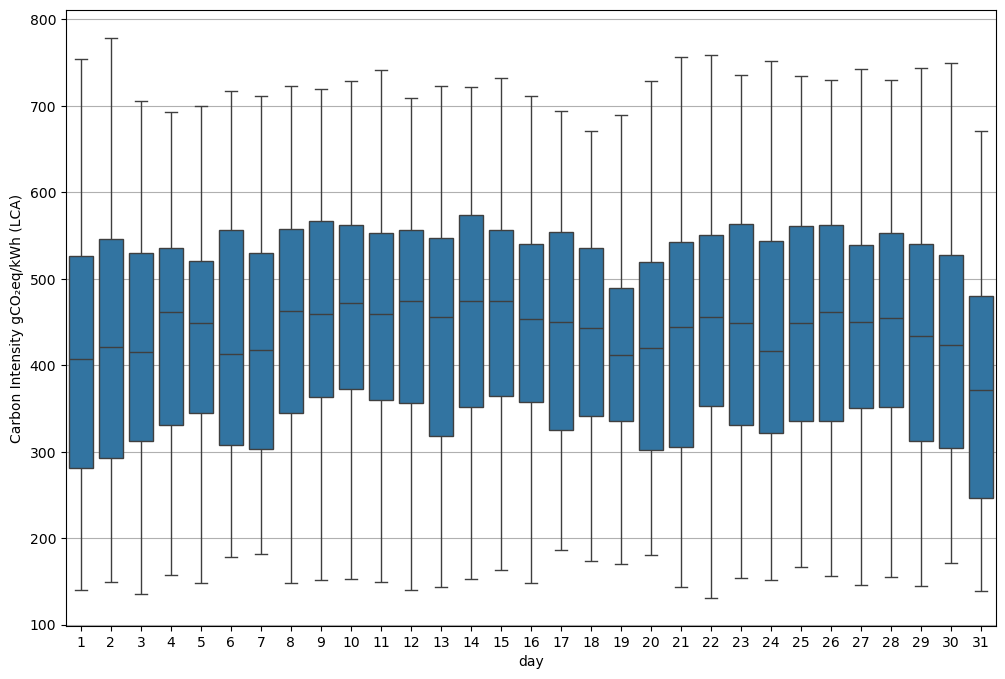

In [18]:
# Step 2: Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='day', y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df)
plt.grid(True, axis="y")
plt.show()

## By Hour

In [19]:
df[["hour", "Carbon Intensity gCO₂eq/kWh (LCA)"]].groupby("hour").describe()

Carbon Intensity gCO₂eq/kWh (LCA)                                  \
                                 count        mean         std     min   
hour                                                                     
0                               1095.0  457.053991  140.472878  154.85   
1                               1095.0  455.448201  140.685717  155.10   
2                               1095.0  456.543817  140.280125  156.10   
3                               1095.0  460.999059  138.953054  159.18   
4                               1095.0  463.297945  135.351427  162.85   
5                               1095.0  459.461014  130.712014  159.34   
6                               1095.0  447.093543  127.901076  148.14   
7                               1095.0  425.354941  128.499703  138.06   
8                               1095.0  399.637068  130.600974  136.54   
9                               1095.0  378.268594  131.289625  131.83   
10                              1095.0  365.408840  131.254026  131.14   
11                              1095.0  359.878164  131.664490  134.84   
12                              1095.0  362.900064  133.088638  138.31   
13                              1095.0  375.655772  135.180475  140.03   
14                              1095.0  398.700100  135.907375  141.27   
15                              1095.0  429.661744  132.032779  146.12   
16                              1095.0  458.221836  124.595067  148.24   
17                              1095.0  475.997425  119.176255  152.96   
18                              1095.0  482.994959  119.029863  156.06   
19                              1095.0  482.581991  124.089110  158.45   
20                              1095.0  479.414584  128.387334  158.81   
21                              1095.0  475.307954  131.981670  160.86   
22                              1095.0  466.566018  136.202268  160.85   
23                              1095.0  459.872749  139.456706  158.00   

                                        
          25%     50%      75%     max  
hour                                    
0     341.595  467.00  569.615  758.98  
1     338.025  465.69  569.180  752.48  
2     340.195  469.18  570.355  750.08  
3     348.345  471.85  572.580  741.48  
4     362.865  478.79  569.285  747.58  
5     366.260  473.51  557.895  772.94  
6     354.055  454.73  542.935  778.89  
7     328.160  429.23  519.895  775.39  
8     300.630  395.56  494.360  754.13  
9     273.215  371.09  470.630  733.96  
10    258.110  357.87  453.745  723.33  
11    251.585  346.49  448.200  719.73  
12    253.100  347.97  454.290  728.70  
13    263.900  365.66  466.215  733.67  
14    289.015  396.11  493.955  737.43  
15    329.025  438.18  523.675  737.31  
16    370.455  470.07  548.180  727.59  
17    391.380  492.74  565.915  720.04  
18    403.445  505.34  570.395  718.58  
19    396.475  504.82  575.635  731.14  
20    389.835  500.30  579.880  751.73  
21    380.215  497.97  578.235  753.78  
22    362.700  485.35  576.005  753.37  
23    349.050  474.13  571.625  756.53

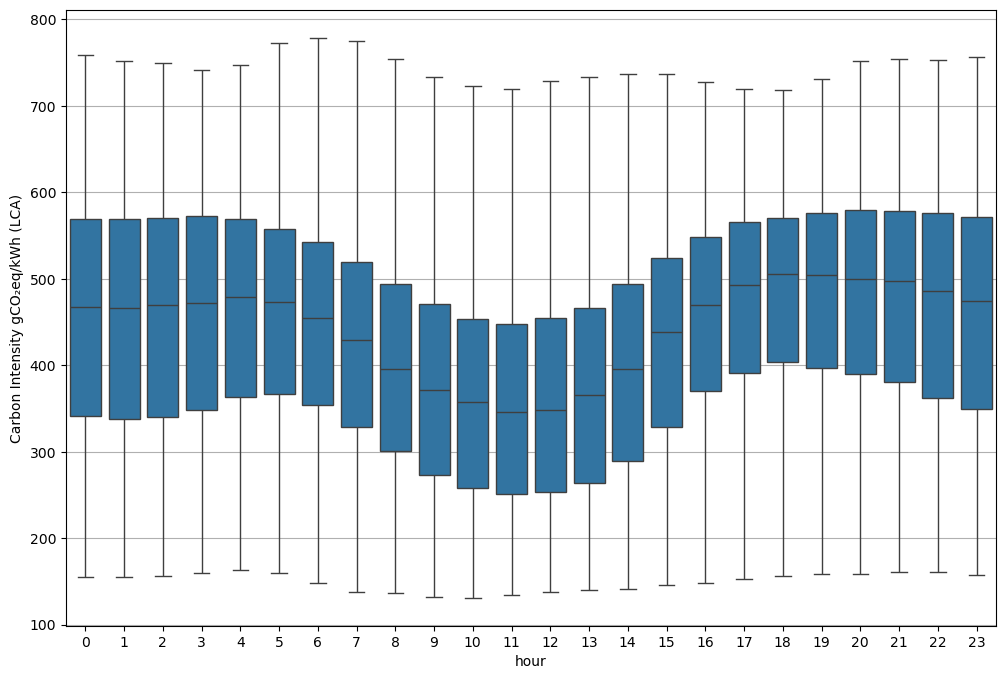

In [20]:
# Step 2: Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='hour', y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df)
plt.grid(True, axis="y")
plt.show()

## Regression

In [21]:
model = np.poly1d(np.polyfit(df["hour"], df['Carbon Intensity gCO₂eq/kWh (LCA)'], 4))
model

poly1d([-1.62706371e-02,  7.23456074e-01, -9.40148594e+00,  3.14329930e+01,
        4.42920890e+02])

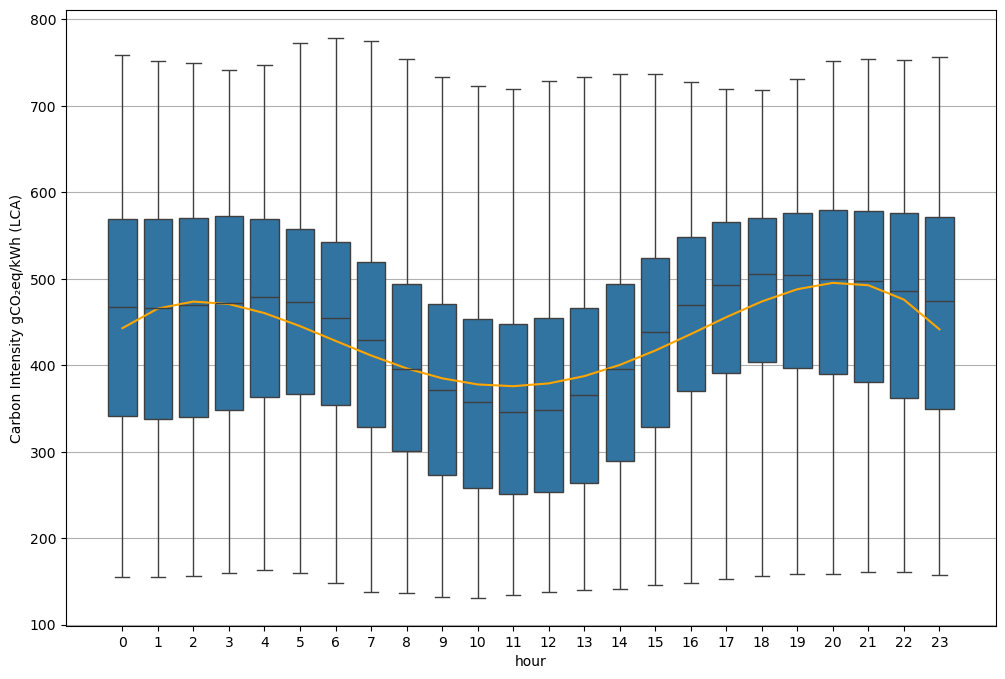

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='hour', y='Carbon Intensity gCO₂eq/kWh (LCA)', data=df)
#add fitted cubic regression line to scatterplot
polyline = np.linspace(0, 23, 24)
plt.plot(polyline, model(polyline), "orange")
plt.grid(True, axis="y")
plt.show()

In [23]:
import urllib.request, json

weather = pd.DataFrame()

with urllib.request.urlopen("https://api.brightsky.dev/weather?date=2021-01-01&last_date=2023-12-31&lat=51.55&lon=9.9&units=dwd") as url:
    data = json.load(url)
    weather = pd.DataFrame(data["weather"])
    weather['timestamp'] = pd.to_datetime(weather['timestamp'])
    weather["hour"] = weather["timestamp"].dt.hour

weather

,timestamp,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,...,visibility,wind_gust_direction,wind_gust_speed,condition,precipitation_probability,precipitation_probability_6h,solar,fallback_source_ids,icon,hour
0,2021-01-01 00:00:00+00:00,6997,0.0,1005.0,NaN,1.6,350,3.6,87.0,0.9,...,7440,10,5.4,rain,None,None,0.0,{},cloudy,0
1,2021-01-01 01:00:00+00:00,6997,0.2,1005.2,NaN,1.4,90,4.0,100.0,1.1,...,10310,100,6.8,rain,None,None,0.0,{},cloudy,1
2,2021-01-01 02:00:00+00:00,6997,0.0,1005.4,NaN,1.4,250,2.5,100.0,1.3,...,5780,160,4.0,rain,None,None,0.0,{},cloudy,2
3,2021-01-01 03:00:00+00:00,6997,0.4,1005.7,0.0,1.2,210,2.2,100.0,1.1,...,2420,190,4.0,rain,None,None,0.0,NaN,cloudy,3
4,2021-01-01 04:00:00+00:00,6997,0.6,1005.8,0.0,0.4,170,3.2,100.0,0.4,...,3310,150,4.0,sleet,None,None,0.0,NaN,sleet,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26252,2023-12-30 20:00:00+00:00,6997,0.0,1013.6,0.0,5.9,140,10.1,87.0,3.4,...,54460,140,16.6,dry,None,None,0.0,NaN,cloudy,20
26253,2023-12-30 21:00:00+00:00,6997,0.0,1013.1,0.0,6.8,130,12.2,100.0,3.8,...,56300,110,21.6,dry,None,None,0.0,NaN,cloudy,21
26254,2023-12-30 22:00:00+00:00,6997,0.0,1012.7,0.0,6.5,110,15.5,87.0,4.1,...,54050,100,28.4,dry,None,None,0.0,NaN,cloudy,22
26255,2023-12-30 23:00:00+00:00,6997,0.0,1012.2,0.0,6.8,130,12.6,100.0,4.4,...,52960,170,25.2,dry,None,None,0.0,NaN,cloudy,23


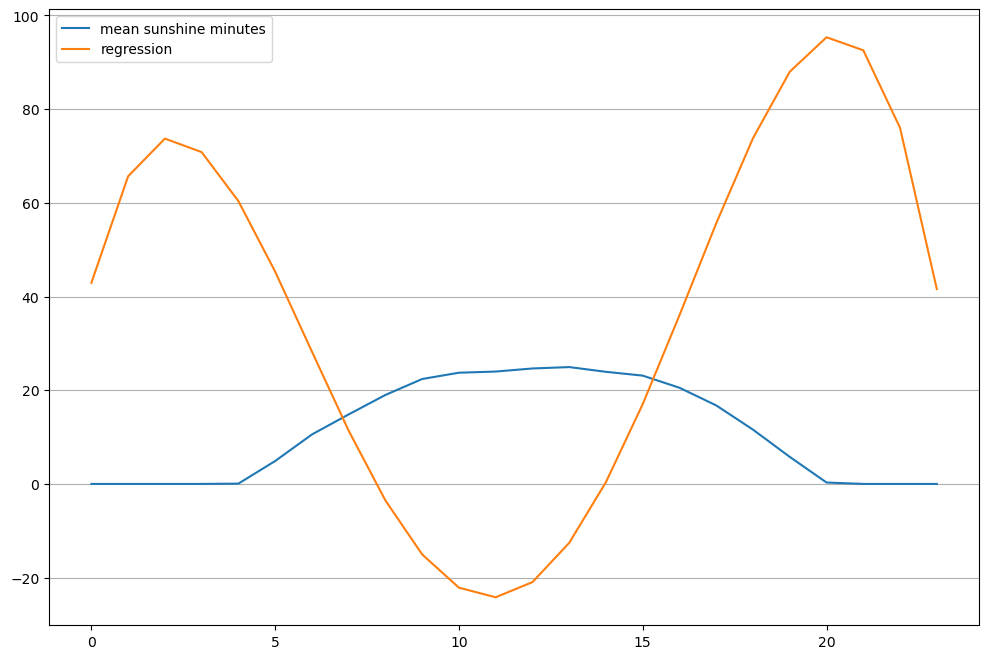

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(weather[["sunshine", "hour"]].groupby("hour").mean(), label="mean sunshine minutes")
plt.plot(polyline, model(polyline) - 400, label="regression")
plt.legend()
plt.grid(True, axis="y")
plt.show()

In [25]:
df[['Carbon Intensity gCO₂eq/kWh (LCA)', "hour"]].groupby("hour").mean()['Carbon Intensity gCO₂eq/kWh (LCA)'].corr(weather[["sunshine", "hour"]].groupby("hour").mean()["sunshine"])

-0.7875527611154182

In [26]:
import pickle
with open("co2_regression.pkl", 'wb') as file:
    pickle.dump(model, file)